In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
titanic_train = pd.read_csv('/Users/user/documents/titanic/train.csv')
titanic_test = pd.read_csv('/Users/user/documents/titanic/test.csv')

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
titanic_train.describe()
#About 38% of the passengers survived, 62% died
#average age was 30
#Average fare was $32

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Sex', ylabel='Count'>

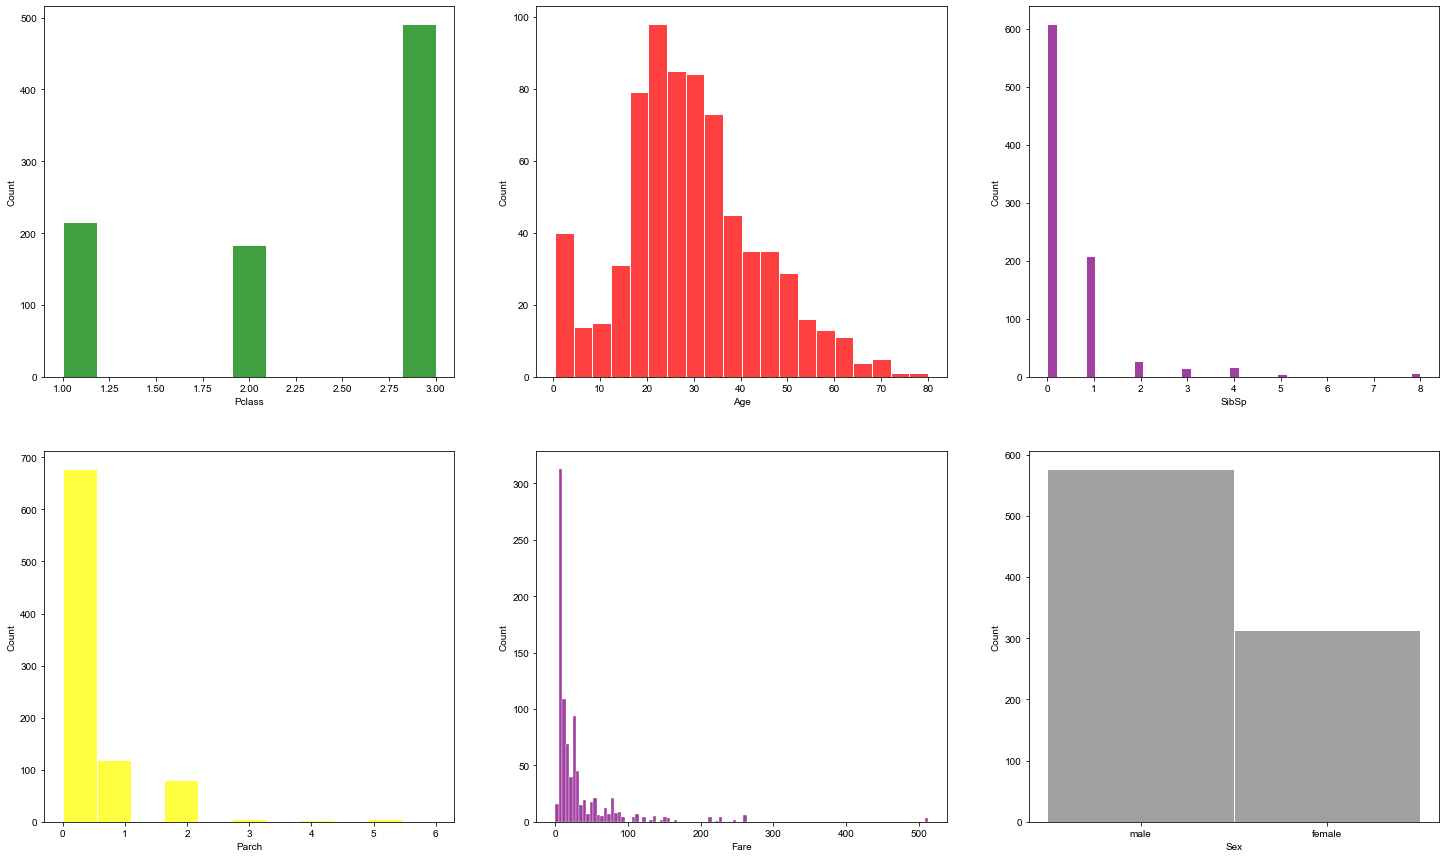

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25,15))
sns.set_theme()
sns.color_palette()
sns.histplot(titanic_train['Pclass'], ax=axes[0,0], color='green')
sns.histplot(titanic_train['Age'], ax=axes[0,1], color='red')
sns.histplot(titanic_train['SibSp'], ax=axes[0,2], color='purple')
sns.histplot(titanic_train['Parch'], ax=axes[1,0], color='yellow')
sns.histplot(titanic_train['Fare'], ax=axes[1,1], color='purple')
sns.histplot(titanic_train['Sex'], ax=axes[1,2], color='grey')

In [7]:
#drop independent variables that are not useful
titanic_train = titanic_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
titanic_test = titanic_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [8]:
list(titanic_train.columns)

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [9]:
print(titanic_train.isnull().sum())
print(titanic_test.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


In [10]:
df=titanic_train
cat_variables = df[['Sex', 'Embarked']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
df_test=titanic_test
cat_variables_test = df_test[['Sex', 'Embarked']]
cat_dummies_test = pd.get_dummies(cat_variables_test, drop_first=True)



In [11]:
df = df.drop(['Sex', 'Embarked'], axis=1)
df = pd.concat([df, cat_dummies], axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [12]:
df_test = df_test.drop(['Sex', 'Embarked'], axis=1)
df_test = pd.concat([df_test, cat_dummies_test], axis=1)
df_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,1.0,0.271174,0.125,0.0,0.014151,1.0,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.0,0.139136,0.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.434531,0.125,0.0,0.103644,0.0,0.0,1.0
4,0.0,1.0,0.434531,0.000,0.0,0.015713,1.0,0.0,1.0


In [14]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,1.0,0.271174,0.125,0.0,0.014151,1.0,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.0,0.139136,0.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.434531,0.125,0.0,0.103644,0.0,0.0,1.0
4,0.0,1.0,0.434531,0.000,0.0,0.015713,1.0,0.0,1.0


In [15]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,1.0,0.271174,0.125,0.0,0.014151,1.0,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.0,0.139136,0.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.434531,0.125,0.0,0.103644,0.0,0.0,1.0
4,0.0,1.0,0.434531,0.000,0.0,0.015713,1.0,0.0,1.0


In [16]:
df.isna().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [17]:
df1=pd.DataFrame(scaler.inverse_transform(df))
df1.head()

,0,1,2,3,4,5,6,7,8
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0


In [18]:
df_test = pd.DataFrame(scaler.fit_transform(df_test), columns = df_test.columns)
df_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1.0,0.452723,0.000,0.000000,0.015282,1.0,1.0,0.0
1,1.0,0.617566,0.125,0.000000,0.013663,0.0,0.0,1.0
2,0.5,0.815377,0.000,0.000000,0.018909,1.0,1.0,0.0
3,1.0,0.353818,0.000,0.000000,0.016908,1.0,0.0,1.0
4,1.0,0.287881,0.125,0.111111,0.023984,0.0,0.0,1.0


In [19]:
df_test = pd.DataFrame(imputer.fit_transform(df_test),columns = df_test.columns)
df_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1.0,0.452723,0.000,0.000000,0.015282,1.0,1.0,0.0
1,1.0,0.617566,0.125,0.000000,0.013663,0.0,0.0,1.0
2,0.5,0.815377,0.000,0.000000,0.018909,1.0,1.0,0.0
3,1.0,0.353818,0.000,0.000000,0.016908,1.0,0.0,1.0
4,1.0,0.287881,0.125,0.111111,0.023984,0.0,0.0,1.0


In [20]:
df_test1=pd.DataFrame(scaler.inverse_transform(df_test))

In [21]:
df1.columns=df.columns
df_test1.columns=df_test.columns

In [22]:
print(df1.isna().sum())
print(df_test1.isna().sum())

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [23]:
print(df1.head())
print(df_test1.head())


   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0       0.0     3.0  22.0    1.0    0.0   7.2500       1.0         0.0   
1       1.0     1.0  38.0    1.0    0.0  71.2833       0.0         0.0   
2       1.0     3.0  26.0    0.0    0.0   7.9250       0.0         0.0   
3       1.0     1.0  35.0    1.0    0.0  53.1000       0.0         0.0   
4       0.0     3.0  35.0    0.0    0.0   8.0500       1.0         0.0   

   Embarked_S  
0         1.0  
1         0.0  
2         1.0  
3         1.0  
4         1.0  
   Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
0     3.0  34.5    0.0    0.0   7.8292       1.0         1.0         0.0
1     3.0  47.0    1.0    0.0   7.0000       0.0         0.0         1.0
2     2.0  62.0    0.0    0.0   9.6875       1.0         1.0         0.0
3     3.0  27.0    0.0    0.0   8.6625       1.0         0.0         1.0
4     3.0  22.0    1.0    1.0  12.2875       0.0         0.0         1.0


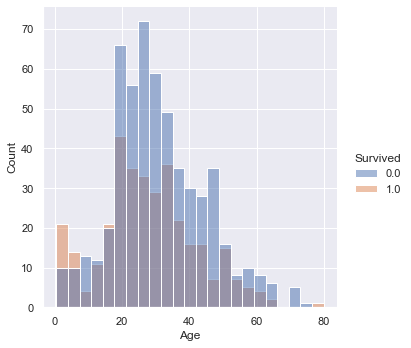

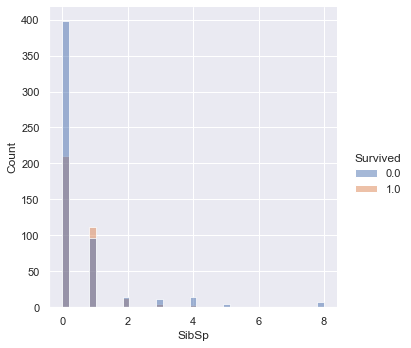

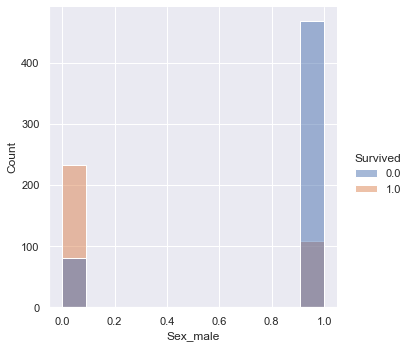

In [24]:
sns.displot(data=df1, x='Age', hue='Survived')
sns.displot(data=df1, x='SibSp', hue='Survived')
sns.displot(data=df1, x='Sex_male', hue='Survived')

In [25]:
#turning age into a categorical variable with 6 categories
label_names = ['Infant', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
cut_points =  [0, 5, 12, 18, 35, 60, 100]

df1['Age_category'] = pd.cut(df1['Age'], cut_points, labels=label_names)
df_test1['Age_category'] = pd.cut(df_test1['Age'], cut_points, labels=label_names)

In [26]:
#dummy variables for age
cat_variables = df1[['Age_category']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
df1 = df1.drop(['Age_category'], axis=1)
df1 = pd.concat([df1, cat_dummies], axis=1)
df1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Age_category_Child,Age_category_Teenager,Age_category_Young Adult,Age_category_Adult,Age_category_Senior
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,0,0,1,0,0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,0,0,0,1,0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,0,0,1,0,0
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,0,0,1,0,0
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0,0,0,1,0,0


In [27]:
#dummy variables for class
cat_variables = df1['Pclass']
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
df1 = df1.drop('Pclass', axis=1)
df1 = pd.concat([df1, cat_dummies], axis=1)
df1.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Age_category_Child,Age_category_Teenager,Age_category_Young Adult,Age_category_Adult,Age_category_Senior,2.0,3.0
0,0.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,0,0,1,0,0,0,1
1,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,0,0,0,1,0,0,0
2,1.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,0,0,1,0,0,0,1
3,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,0,0,1,0,0,0,0
4,0.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0,0,0,1,0,0,0,1


In [28]:
#create dummy variables for regression
cat_variables = df_test1[['Age_category']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
df_test1 = df_test1.drop(['Age_category'], axis=1)
df_test1 = pd.concat([df_test1, cat_dummies], axis=1)
df_test1.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Age_category_Child,Age_category_Teenager,Age_category_Young Adult,Age_category_Adult,Age_category_Senior
0,3.0,34.5,0.0,0.0,7.8292,1.0,1.0,0.0,0,0,1,0,0
1,3.0,47.0,1.0,0.0,7.0000,0.0,0.0,1.0,0,0,0,1,0
2,2.0,62.0,0.0,0.0,9.6875,1.0,1.0,0.0,0,0,0,0,1
3,3.0,27.0,0.0,0.0,8.6625,1.0,0.0,1.0,0,0,1,0,0
4,3.0,22.0,1.0,1.0,12.2875,0.0,0.0,1.0,0,0,1,0,0


In [29]:

cat_variables = df_test1['Pclass']
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
df_test1 = df_test1.drop('Pclass', axis=1)
df_test1 = pd.concat([df_test1, cat_dummies], axis=1)
df_test1.head()

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Age_category_Child,Age_category_Teenager,Age_category_Young Adult,Age_category_Adult,Age_category_Senior,2.0,3.0
0,34.5,0.0,0.0,7.8292,1.0,1.0,0.0,0,0,1,0,0,0,1
1,47.0,1.0,0.0,7.0000,0.0,0.0,1.0,0,0,0,1,0,0,1
2,62.0,0.0,0.0,9.6875,1.0,1.0,0.0,0,0,0,0,1,1,0
3,27.0,0.0,0.0,8.6625,1.0,0.0,1.0,0,0,1,0,0,0,1
4,22.0,1.0,1.0,12.2875,0.0,0.0,1.0,0,0,1,0,0,0,1


In [30]:
#normalize data
from sklearn.preprocessing import minmax_scale

for col in ['SibSp', 'Parch', 'Fare']:
    df1[col + '_scaled'] = minmax_scale(df1[col])
    df_test1[col + '_scaled'] = minmax_scale(df_test1[col])

In [31]:
df1.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Age_category_Child,Age_category_Teenager,Age_category_Young Adult,Age_category_Adult,Age_category_Senior,2.0,3.0,SibSp_scaled,Parch_scaled,Fare_scaled
0,0.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,0,0,1,0,0,0,1,0.125,0.0,0.014151
1,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,0,0,0,1,0,0,0,0.125,0.0,0.139136
2,1.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,0,0,1,0,0,0,1,0.000,0.0,0.015469
3,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,0,0,1,0,0,0,0,0.125,0.0,0.103644
4,0.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0,0,0,1,0,0,0,1,0.000,0.0,0.015713


In [32]:
#fix column names
df1.rename(columns={2.0: 'Pclass2', 3.0 : 'Pclass3'}, inplace=True)
df_test1.rename(columns={2.0: 'Pclass2', 3.0 : 'Pclass3'}, inplace=True)

df1.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Age_category_Child,Age_category_Teenager,Age_category_Young Adult,Age_category_Adult,Age_category_Senior,Pclass2,Pclass3,SibSp_scaled,Parch_scaled,Fare_scaled
0,0.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,0,0,1,0,0,0,1,0.125,0.0,0.014151
1,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,0,0,0,1,0,0,0,0.125,0.0,0.139136
2,1.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,0,0,1,0,0,0,1,0.000,0.0,0.015469
3,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,0,0,1,0,0,0,0,0.125,0.0,0.103644
4,0.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0,0,0,1,0,0,0,1,0.000,0.0,0.015713


In [33]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()

columns = ['Age_category_Child', 'Age_category_Teenager',
       'Age_category_Young Adult', 'Age_category_Adult',
       'Age_category_Senior', 'Fare_scaled', 'Pclass2', "Pclass3",
       'Sex_male','SibSp_scaled', 'Parch_scaled']




In [34]:
scores = cross_val_score(lr, df1[columns], df1['Survived'], cv=10, scoring='accuracy')
print(np.mean(scores))

0.8013358302122346


In [35]:
#XGboost model
import xgboost as xgb

xgboost = xgb.XGBClassifier(random_state=1, verbosity=0, use_label_encoder=False)

scores = cross_val_score(xgboost, df1[columns], df1['Survived'], cv=10, scoring='accuracy')
print(np.mean(scores))

0.8238077403245943


<ipython-input-36-b8f0d56e10d0>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlations, dtype=np.bool)


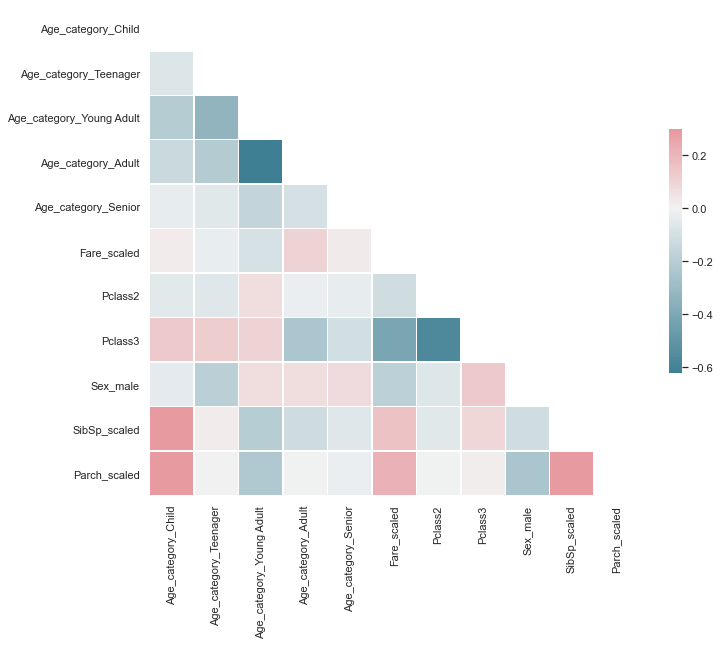

In [36]:
#correlation matrix
correlations = df1[columns].corr()
sns.set(style='white')
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [37]:
df1[columns]

,Age_category_Child,Age_category_Teenager,Age_category_Young Adult,Age_category_Adult,Age_category_Senior,Fare_scaled,Pclass2,Pclass3,Sex_male,SibSp_scaled,Parch_scaled
0,0,0,1,0,0,0.014151,0,1,1.0,0.125,0.000000
1,0,0,0,1,0,0.139136,0,0,0.0,0.125,0.000000
2,0,0,1,0,0,0.015469,0,1,0.0,0.000,0.000000
3,0,0,1,0,0,0.103644,0,0,0.0,0.125,0.000000
4,0,0,1,0,0,0.015713,0,1,1.0,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,0,0,0.025374,1,0,1.0,0.000,0.000000
887,0,0,1,0,0,0.058556,0,0,0.0,0.000,0.000000
888,0,0,1,0,0,0.045771,0,1,0.0,0.125,0.333333
889,0,0,1,0,0,0.058556,0,0,1.0,0.000,0.000000


In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1[columns], df1['Survived'], test_size=.20)

In [39]:
xgboost = xgb.XGBClassifier(random_state=1, 
                            n_estimators = 1000, 
                            learning_rate = .05,
                            max_depth = 4,
                            verbosity = 0, 
                            use_label_encoder = False)

xgboost.fit(x_train, y_train, 
            early_stopping_rounds = 5, 
            eval_metric = 'error', 
            eval_set = [[x_test, y_test]], verbose=0)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=16, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)

In [45]:
from sklearn.model_selection import GridSearchCV

clf = xgb.XGBClassifier(random_state=1, verbosity=0, use_label_encoder=False)
hyperparameters = {
    'n_estimators': [1000],
    'learning_rate': [.25, .05, .1],
    'max_depth': [3, 4, 5, 10]
                   }

fit_params={'early_stopping_rounds':15, 
            'eval_metric': 'error', 
            'eval_set':[[x_test, y_test]]}

gs = GridSearchCV(clf, param_grid=hyperparameters, verbose=0, cv=10, scoring='accuracy')
gs.fit(x_train, y_train, **fit_params, verbose=0)

best_params = gs.best_params_
best_score = gs.best_score_

print(best_params) 
print(best_score)

{'learning_rate': 0.25, 'max_depth': 10, 'n_estimators': 1000}
0.8160406885758998


In [46]:
xgboost = xgb.XGBClassifier(random_state=1, 
                            n_estimators = 1000, 
                            learning_rate = .25,
                            max_depth = 10,
                            verbosity = 0, 
                            use_label_encoder = False)

xgboost.fit(x_train, y_train, 
            early_stopping_rounds = 5, 
            eval_metric = 'error', 
            eval_set = [[x_test, y_test]], verbose=0)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=16, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)

In [47]:
titanic_test_new = pd.read_csv('/Users/user/documents/titanic/test.csv')

In [48]:
def save_submission(model, cols, filename='titanic_sub.csv'):
    test_data = df_test1[cols]
    predictions = model.predict(test_data)
    p_ids = titanic_test_new['PassengerId']
    submission_df = {"PassengerId": p_ids,
                    'Survived': predictions}
    submission = pd.DataFrame(submission_df)
    submission.to_csv(filename, index=False)

In [49]:
save_submission(xgboost, columns)